<a href="https://colab.research.google.com/github/Loga19818eeanvesh/Natural_Language_Processing_Sequence_Models_Assignments/blob/main/tf_c3w3_l3_cnn_conv1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompletePQ2R7L/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompletePQ2R7L/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompletePQ2R7L/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [16]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 64)          523840    
                                                                 
 conv1d_5 (Conv1D)           (None, None, 128)         41088     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
________________________________________________

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [18]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)


Epoch 1/10
391/391 [==============================] - 254s 646ms/step - loss: 0.4523 - accuracy: 0.7669 - val_loss: 0.3074 - val_accuracy: 0.8660
Epoch 2/10
391/391 [==============================] - 255s 650ms/step - loss: 0.1857 - accuracy: 0.9301 - val_loss: 0.2948 - val_accuracy: 0.8792
Epoch 3/10
391/391 [==============================] - 261s 666ms/step - loss: 0.0561 - accuracy: 0.9854 - val_loss: 0.2938 - val_accuracy: 0.8934
Epoch 4/10
391/391 [==============================] - 259s 661ms/step - loss: 0.0092 - accuracy: 0.9994 - val_loss: 0.3356 - val_accuracy: 0.8972
Epoch 5/10
391/391 [==============================] - 259s 661ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3655 - val_accuracy: 0.8973
Epoch 6/10
391/391 [==============================] - 257s 655ms/step - loss: 7.4424e-04 - accuracy: 1.0000 - val_loss: 0.3834 - val_accuracy: 0.8980
Epoch 7/10
391/391 [==============================] - 262s 668ms/step - loss: 5.6318e-04 - accuracy: 1.0000 - val_loss: 

In [19]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


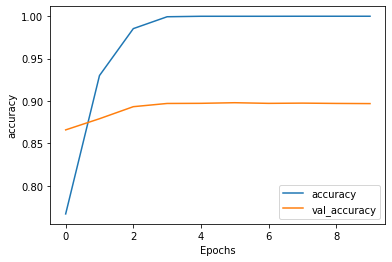

In [20]:
plot_graphs(history, 'accuracy')


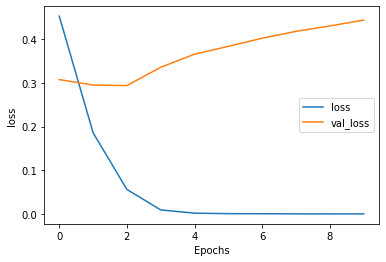

In [21]:
plot_graphs(history, 'loss')